In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud
%pip install chart_studio
!pip install -U nltk
!pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import chart_studio.plotly as py
import ast
from datetime import datetime

df = pd.read_csv('Data/schannel.csv')
print(df.head())


                                             post_id  \
0  pfbid02jxEmgJp6XwRGwMwNd1TGV8MaWAe24BjN3YzyFYc...   
1  pfbid0aczaXsc78Af5W1nyoaP7AE2QS5ycqSiG6RXm7Qoq...   
2  pfbid0WJFHcYjZb7cLpzgEb4bCZtzVjNzisdNJQts82KhU...   
3  pfbid0yRXbjR5wX6YyAhstdhjapSrGfvcRbP1RXHaMSi3P...   
4  pfbid02YsRkVQSe9j1hMCXAwsSdnvQC8ZQqWcQhKsXVL9t...   

                                                text                 time  \
0  HIỆN TẠI NGỌC TRINH VẪN ĐANG BỊ TAM GIAM ‼\n\n...  2023-12-03 23:31:00   
1  CẢNH BÁO: SCHANNEL KHÔNG ĐĂNG TUYỂN HAY CÓ BẤT...  2023-04-03 18:52:00   
2  Đơn xin nghỉ học đầy "dở khóc dở cười" của nam...  2023-12-05 00:00:00   
3  Miền Bắc sẽ rét như hiện tại trong ít nhất 2 n...  2023-12-06 00:00:00   
4  CHÚC MỪNG SINH NHẬT CAMERAMEN "ĐẮT SHOW NHẤT S...  2023-12-21 00:00:00   

   comments  shares                                      comments_full  \
0       1.0     0.0                                                 []   
1     153.0     3.0  [{'comment_id': '12185340321349

Count the total number of comments, shares and reactions

In [4]:
df['total_interactions'] = df['comments'] + df['shares'] + df['reaction_count']
comment_count = df['comments'].sum()
share_count = df['shares'].sum()
reaction_count = df['reaction_count'].sum()

print("Total comments:", comment_count)
print("Total shares:", share_count)
print("Total reactions:", reaction_count)

Total comments: 13642.0
Total shares: 2624.0
Total reactions: 356611


Analyze each type of reaction by day



Plot the distribution of total interactions

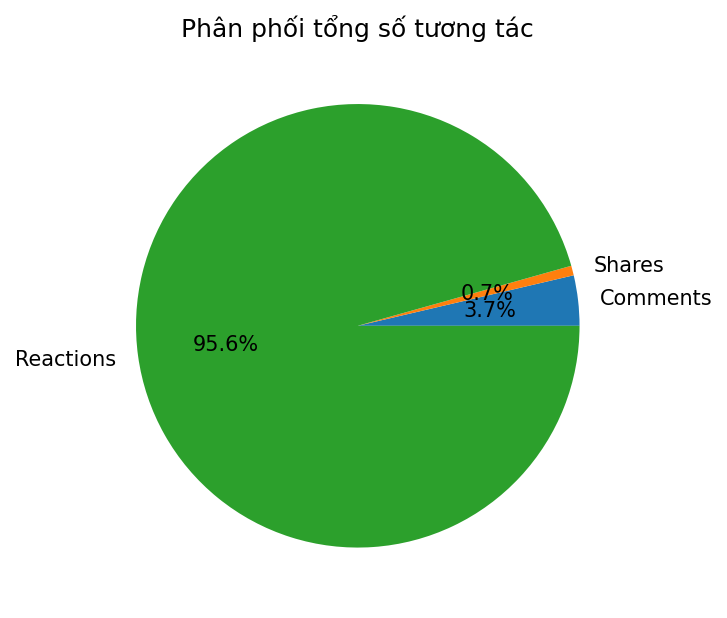

In [5]:
# Create a list of values ​​and labels for the chart
values = [comment_count, share_count, reaction_count]
labels = ['Comments', 'Shares', 'Reactions']

plt.figure(dpi=150)
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Phân phối tổng số tương tác')
plt.show()



Relationship between number of comments and shares

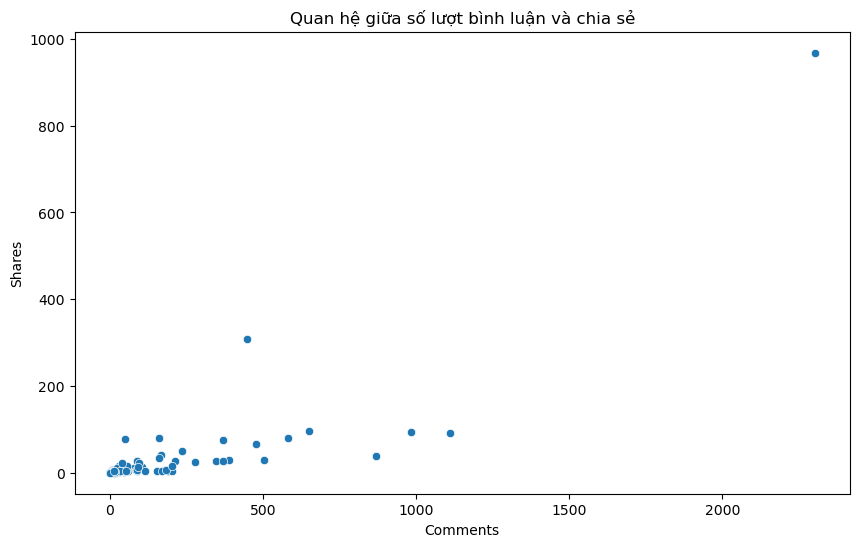

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='comments', y='shares')
plt.xlabel('Comments')
plt.ylabel('Shares')
plt.title('Quan hệ giữa số lượt bình luận và chia sẻ')
plt.show()


Correlation between total interactions, number of comments and article length

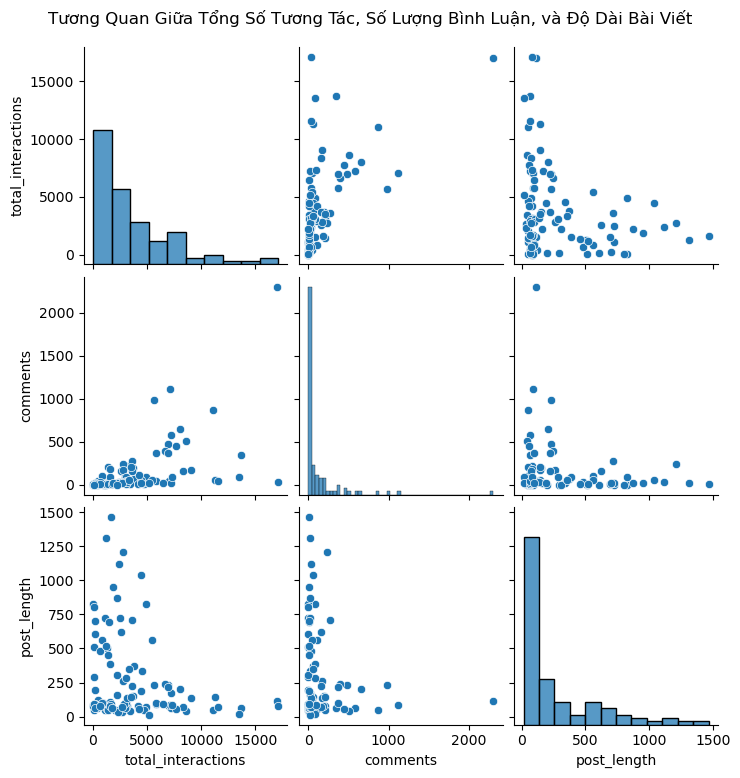

In [7]:
df['post_length'] = df['text'].apply(len)

# Creating pairplot to observe correlations
sns.pairplot(df[['total_interactions', 'comments', 'post_length']])
plt.suptitle('Tương Quan Giữa Tổng Số Tương Tác, Số Lượng Bình Luận, và Độ Dài Bài Viết', y=1.03)
plt.show()

Statistics of each reaction of posts

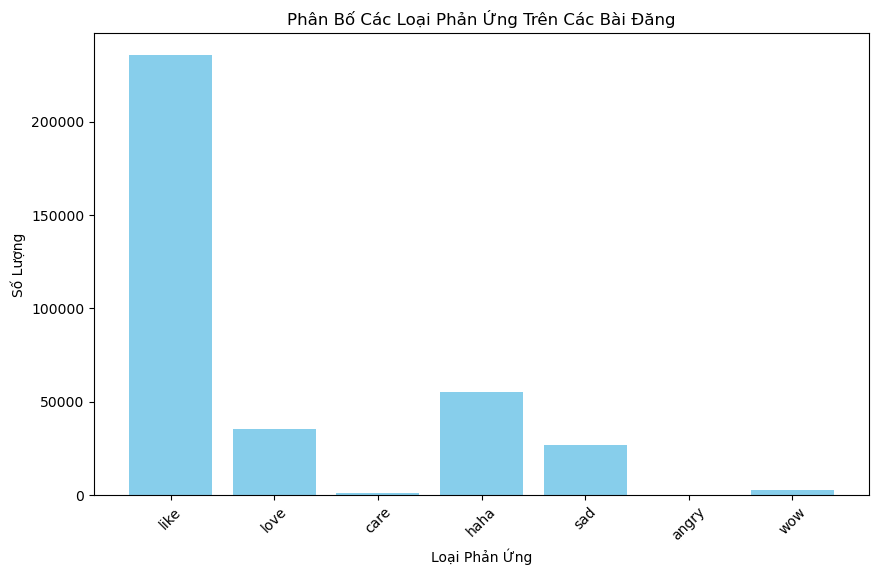

In [8]:
df['reactions'] = df['reactions'].apply(ast.literal_eval)

# Sum up the reactions of each type again
reaction_sums = {'like': 0, 'love': 0, 'care': 0, 'haha': 0, 'sad': 0, 'angry': 0, 'wow': 0}
for index, row in df.iterrows():
    for reaction, count in row['reactions'].items():
        if reaction in reaction_sums:
            reaction_sums[reaction] += count

# Creating a bar chart for the reaction types again
plt.figure(figsize=(10, 6))
plt.bar(reaction_sums.keys(), reaction_sums.values(), color='skyblue')
plt.xlabel('Loại Phản Ứng')
plt.ylabel('Số Lượng')
plt.title('Phân Bố Các Loại Phản Ứng Trên Các Bài Đăng')
plt.xticks(rotation=45)
plt.show()


Number of posts by day

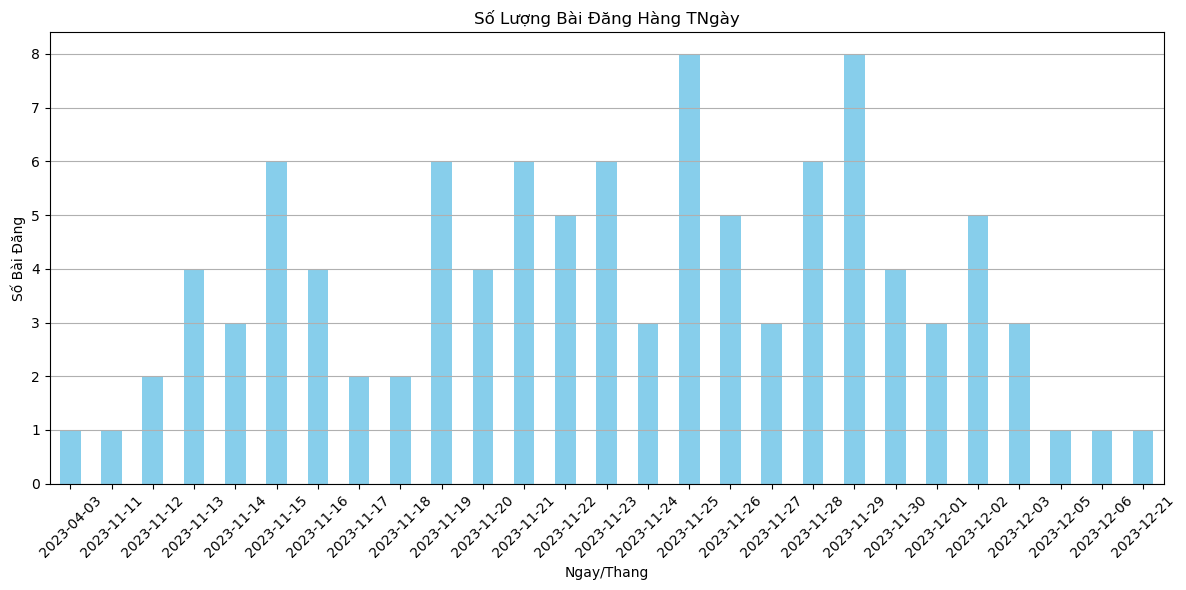

In [9]:
df['time'] = pd.to_datetime(df['time'])

df['day_month'] = df['time'].dt.to_period('D')
monthly_posts = df.groupby('day_month').size()

# Plotting the trend of posts per month
plt.figure(figsize=(12, 6))
monthly_posts.plot(kind='bar', color='skyblue')
plt.title('Số Lượng Bài Đăng Hàng TNgày')
plt.xlabel('Ngay/Thang')
plt.ylabel('Số Bài Đăng')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Number of posts by hour of the day

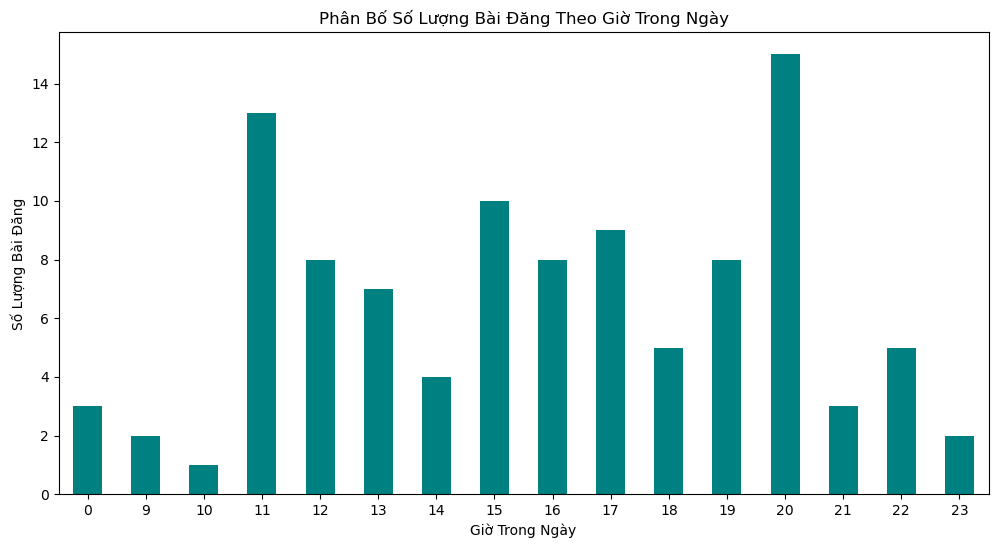

In [10]:
df['time'] = pd.to_datetime(df['time'])

# Extract hour from the datetime
df['hour'] = df['time'].dt.hour

# Count the number of posts per hour
hourly_posts = df['hour'].value_counts().sort_index()

# Creating a bar chart for post frequency per hour
plt.figure(figsize=(12, 6))
hourly_posts.plot(kind='bar', color='teal')
plt.xlabel('Giờ Trong Ngày')
plt.ylabel('Số Lượng Bài Đăng')
plt.title('Phân Bố Số Lượng Bài Đăng Theo Giờ Trong Ngày')
plt.xticks(rotation=0)
plt.show()